### As we have collected data previously , Now we will Analyse that data and find some insights

In [1]:
# First of all , we will import some libraries
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##### Importing Dataset & EDA

In [2]:
#First of all we will import our dataset in a dataframe
data = pd.read_csv('codebasic.csv')

In [3]:
data.head()

,Title,Published_date,Views,Likes,Comments
0,Regex For NLP: NLP Tutorial For Beginners In P...,2022-01-29,10321,357,24
1,Why NLP is booming right now? | NLP Tutorial F...,2022-01-27,14118,451,29
2,Not getting enough time to learn data science?...,2022-01-26,9263,415,18
3,NLP Tutorial For Beginners In Python - 1: In...,2022-01-22,24690,997,65
4,Codebasics Coding Competition: 💥 𝐂𝐎𝐃𝐄-𝐀-𝐓𝐇𝐎𝐍 💥,2022-01-21,2981,129,14


In [4]:
print('Number of rows = ',data.shape[0],'\nNumber of columns = ',data.shape[1],'\nSize of the dataset = ',data.size,' elements.')

Number of rows =  475 
Number of columns =  5 
Size of the dataset =  2375  elements.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           475 non-null    object
 1   Published_date  475 non-null    object
 2   Views           475 non-null    int64 
 3   Likes           475 non-null    int64 
 4   Comments        475 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 18.7+ KB


In [6]:
data.describe()

,Views,Likes,Comments
count,475.000000,475.00000,475.000000
mean,66526.892632,1432.20000,115.130526
std,107040.410296,2920.82686,232.180164
min,1076.000000,22.00000,0.000000
25%,10917.000000,305.50000,30.000000
50%,30176.000000,605.00000,57.000000
75%,70749.000000,1291.50000,119.500000
max,976660.000000,29734.00000,3328.000000


In [7]:
channel_subscribers = 50,600

### Making published date and time more readable

In [8]:
# Importing datetime library which provides great functions to handle date and time information
import datetime
i=0
for i in range(data.shape[0]):
    date_time_obj = datetime.datetime.strptime(data['Published_date'].at[i], '%Y-%m-%d')
    data['Published_date'].at[i] = date_time_obj
    i = i+1

In [9]:
i=0
date=[]
year=[]
month=[]
day=[]
for i in range(data.shape[0]):
    d = data['Published_date'][i].date();
    y = data['Published_date'][i].date().year;
    m = data['Published_date'][i].date().month;
    da = data['Published_date'][i].date().day;
    date.append(d) # Storing dates
    year.append(y) # Storing years
    month.append(m) # Storing months
    day.append(da) # Storing days
    i = i+1
data.drop(['Published_date'], inplace=True,axis=1)
data['Published_date']=date
data['year']=year
data['month'] = month
data['day'] = day

In [10]:
data

,Title,Views,Likes,Comments,Published_date,year,month,day
0,Regex For NLP: NLP Tutorial For Beginners In P...,10321,357,24,2022-01-29,2022,1,29
1,Why NLP is booming right now? | NLP Tutorial F...,14118,451,29,2022-01-27,2022,1,27
2,Not getting enough time to learn data science?...,9263,415,18,2022-01-26,2022,1,26
3,NLP Tutorial For Beginners In Python - 1: In...,24690,997,65,2022-01-22,2022,1,22
4,Codebasics Coding Competition: 💥 𝐂𝐎𝐃𝐄-𝐀-𝐓𝐇𝐎𝐍 💥,2981,129,14,2022-01-21,2022,1,21
...,...,...,...,...,...,...,...,...
470,Python Tutorial - 5. Lists,29259,280,52,2015-12-20,2015,12,20
471,Python Tutorial - 4. Strings,27504,306,27,2015-12-20,2015,12,20
472,Python Tutorial - 3. Numbers,30802,308,30,2015-12-20,2015,12,20
473,Python Tutorial - 2. Variables,40528,315,24,2015-12-20,2015,12,20


### Exploratory Analysis and Visualization

In this section,will see different relationships among channel statistics parameters ( views, likes, comments, dislikes etc). 

##### Total views, likes, and comments of all videos

In [11]:
data[['Views','Likes','Comments']].sum()

Views       31600274
Likes         680295
Comments       54687
dtype: int64

##### Average no. of views, likes, comments on each video 

In [12]:
AvgLikes = data.describe()['Likes']['mean']
AvgViews = data.describe()['Views']['mean']
AvgComments = data.describe()['Comments']['mean']
print('Average number of views on video = ',AvgViews,'\nAverage number of likes on video = ',AvgLikes,'\nAverage number of comments on video = ',AvgComments,'\n')

Average number of views on video =  66526.89263157894 
Average number of likes on video =  1432.2 
Average number of comments on video =  115.13052631578947 



### Relationship among statistics parameters using Pie Charts

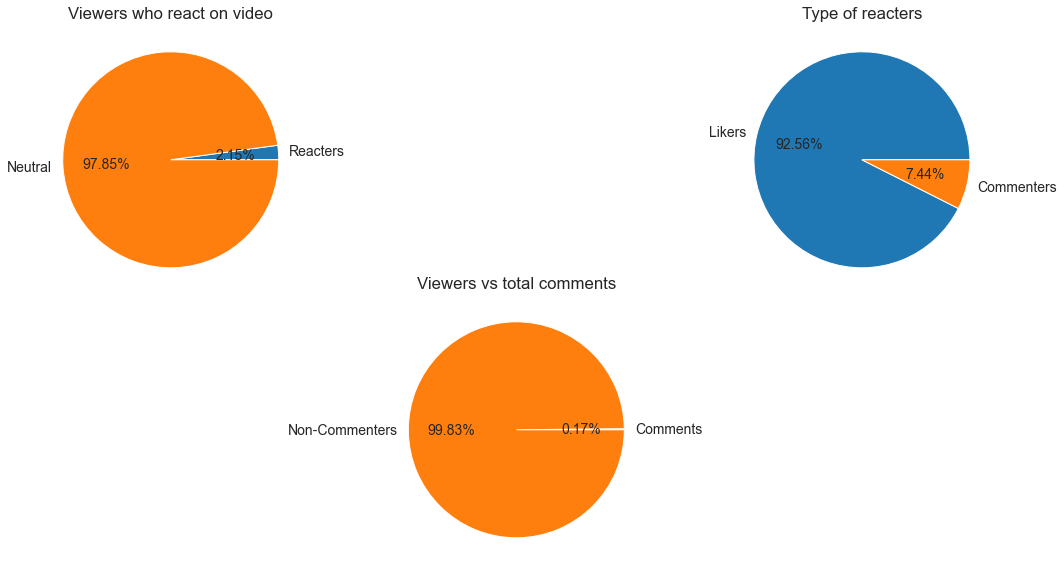

In [13]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, 0.75, 0.75], aspect=1) # add_axes([left, bottom, width, height],aspect=1)
# Viewers who react on videos
pie_vars = ['Reacters','Neutral'];
pie_values = [data['Likes'].sum(),data['Views'].sum()-(data['Likes'].sum())]
ax1.pie(pie_values,labels=pie_vars,autopct='%1.2f%%');
ax1.set_title('Viewers who react on video')

ax2 = fig.add_axes([0.8, 0, 0.75, 0.75], aspect=1)
# Pie chart of reacters
pie_vars = ['Likers','Commenters'];
pie_values = [data['Likes'].sum(),data['Comments'].sum()]
ax2.pie(pie_values,labels=pie_vars,autopct='%1.2f%%');
ax2.set_title('Type of reacters')

ax3= fig.add_axes([0.4, -0.75, 0.75, 0.75], aspect=1)
# Pie chart of commenters vs non commenters with respect to total viewers
pie_vars = ['Comments','Non-Commenters'];
pie_values = [data['Comments'].sum(),data['Views'].sum()-data['Comments'].sum()]
ax3.pie(pie_values,labels=pie_vars,autopct='%1.2f%%');
ax3.set_title('Viewers vs total comments')

plt.show()

**Insights**: <br>1. We can see that 97.85 of the people don't react o  videos. Only a tiny percentage of people like,or comment on this channel's videos. <br>2. 92.50% people likes videos on this channel according to the reacters.<br>3. People who comments on T-Series videos are less than 7.50% as someone can comment multiple times.

## Monthwise Statistics

#### Monthwise uploaded videos

In [14]:
videos_per_month = data.groupby('month', as_index=False).size()
videos_per_month

,month,size
0,1,45
1,2,30
2,3,32
3,4,30
4,5,67
5,6,38
6,7,37
7,8,41
8,9,30
9,10,28


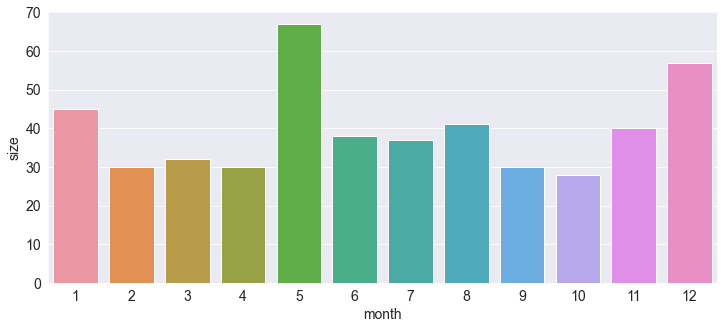

In [15]:
ax2 = sns.barplot(x='month', y='size', data=videos_per_month)

**Insights**:<br>1. Codebasic Channel uploads highest number of videos in month of 'May' which is two times more than videos being uploaded in other months.<br>2. Codebasics Channel uploads lowest number of videos in month of 'October'.

#### Monthwise total views, likes and comments

In [16]:
data.groupby(data['month']).sum()

,Views,Likes,Comments,year,day
month,,,,,
1,4771800,96538,8748,90896,607
2,2849730,67856,5929,60564,501
3,2030820,42389,3317,64623,517
4,1331884,32592,2609,60588,437
5,3023212,51638,4120,135293,927
6,2605945,49438,3908,76748,666
7,3315752,62016,5782,74712,593
8,1959663,38754,3536,82804,719
9,2796112,72369,4317,60575,417


#### Monthwise statistics using scatterplots

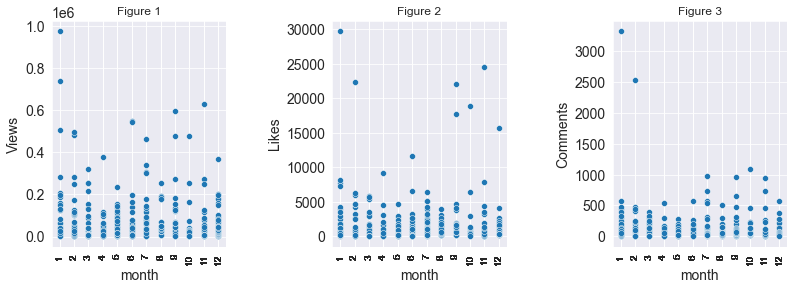

In [17]:
# Importing sys module which provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.
import sys

if not sys.warnoptions:
    # Importing warnings library to handle warnings
    import warnings
    warnings.simplefilter("ignore")
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Monthwise statistics of views
sns.scatterplot(data['month'],data['Views'],ax=ax1)
ax1.set_title('Figure 1',fontsize=12)
ax1.set_xticks(data['month'])
ax1.set_xticklabels(data['month'],rotation=90,fontsize=10)

# Monthwise statistics of likes
sns.scatterplot(data['month'],data['Likes'],ax=ax2)
ax2.set_title('Figure 2',fontsize=12)
ax2.set_xticks(data['month'])
ax2.set_xticklabels(data['month'],rotation=90,fontsize=10)


# Monthwise statistics of Comments
sns.scatterplot(data['month'],data['Comments'],ax=ax3)
ax3.set_title('Figure 3',fontsize=12)
ax3.set_xticks(data['month'])
ax3.set_xticklabels(data['month'],rotation=90,fontsize=10)
plt.tight_layout(pad=3)

**Insights**: <br>1. Codebasic uploaded its most viewed video in month of 'january'.<br>2. Codebasics uploaded its most liked video in month of 'January'.<br>3. Codebasics uploaded its most commented video in month of 'January'.

### Yearwise Statistics

#### Yearwise uploaded videos

In [18]:
data.groupby('year')['year'].count()

year
2015      8
2016     60
2017     32
2018     15
2019     39
2020    175
2021    137
2022      9
Name: year, dtype: int64

**Insights**: Codebasics uploaded highest number of videos in year 2020.

#### Yearwise total views, likes and comments

In [19]:
data.groupby(data['year']).sum()

,Views,Likes,Comments,month,day
year,,,,,
2015,293643,2459,253,96,176
2016,4287106,47659,3295,360,1001
2017,4779729,66828,3598,200,463
2018,3442178,48287,5631,118,196
2019,2285699,36235,3461,231,418
2020,11557030,332341,24931,1320,2885
2021,4840705,142355,13271,811,2081
2022,114184,4131,247,9,163


#### Yearwise statistics using scatterplots

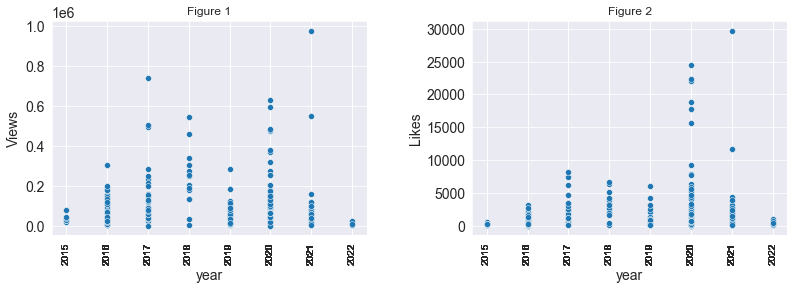

In [20]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
fig, (ax1, ax2) = plt.subplots(1, 2)

# Yearwise statistics of views
sns.scatterplot(data['year'],data['Views'],ax=ax1)
ax1.set_title('Figure 1',fontsize=12)
ax1.set_xticks(data['year'])
ax1.set_xticklabels(data['year'],rotation=90,fontsize=10)

# Yearwise statistics of likes
sns.scatterplot(data['year'],data['Likes'],ax=ax2)
ax2.set_title('Figure 2',fontsize=12)
ax2.set_xticks(data['year'])
ax2.set_xticklabels(data['year'],rotation=90,fontsize=10)

plt.tight_layout(pad=3)

**Insights**: <br>1. Codebasics uploaded its most viewed video in the year '2021'.<br>2. codebasics uploaded its most liked video in the year '2021'.

#### Top 10 most viewed & Liked videos from the dataset

In [21]:
top_viewed_video = data.sort_values(by='Views',ascending=False).head(10)
top_viewed_video

,Title,Views,Likes,Comments,Published_date,year,month,day
143,Bitcoin mining with 15 lines of python code | ...,976660,29734,3328,2021-01-03,2021,1,3
403,Python Pandas Tutorial 1. What is Pandas pytho...,740875,8224,335,2017-01-21,2017,1,21
173,"Learn data analyst skills in 3 months, step by...",627778,24475,953,2020-11-25,2020,11,25
216,Complete python roadmap | How to become an exp...,596123,22115,964,2020-09-13,2020,9,13
71,He cracked FAANG interviews in 10 companies in...,547533,11691,574,2021-06-19,2021,6,19
372,Machine Learning Tutorial Python -1: What is M...,542266,6651,180,2018-06-30,2018,6,30
402,Python Pandas Tutorial 2: Dataframe Basics,504548,7359,393,2017-01-28,2017,1,28
400,Python Pandas Tutorial 4: Read Write Excel CSV...,494854,6251,448,2017-02-04,2017,2,4
310,How to learn data analyst skills for free | Ho...,482401,22326,2529,2020-02-08,2020,2,8
221,8 Skills to get a data analyst job | Skills to...,478699,17751,652,2020-09-02,2020,9,2


In [22]:
data.sort_values(by='Likes',ascending=False).head(10)

,Title,Views,Likes,Comments,Published_date,year,month,day
143,Bitcoin mining with 15 lines of python code | ...,976660,29734,3328,2021-01-03,2021,1,3
173,"Learn data analyst skills in 3 months, step by...",627778,24475,953,2020-11-25,2020,11,25
310,How to learn data analyst skills for free | Ho...,482401,22326,2529,2020-02-08,2020,2,8
216,Complete python roadmap | How to become an exp...,596123,22115,964,2020-09-13,2020,9,13
201,Step by step roadmap to learn data science in ...,476523,18829,1096,2020-10-17,2020,10,17
221,8 Skills to get a data analyst job | Skills to...,478699,17751,652,2020-09-02,2020,9,2
166,"Learn coding in 3 months, step by step coding ...",370055,15725,575,2020-12-01,2020,12,1
71,He cracked FAANG interviews in 10 companies in...,547533,11691,574,2021-06-19,2021,6,19
294,How to learn coding for beginners | Learn codi...,378936,9232,533,2020-04-05,2020,4,5
403,Python Pandas Tutorial 1. What is Pandas pytho...,740875,8224,335,2017-01-21,2017,1,21


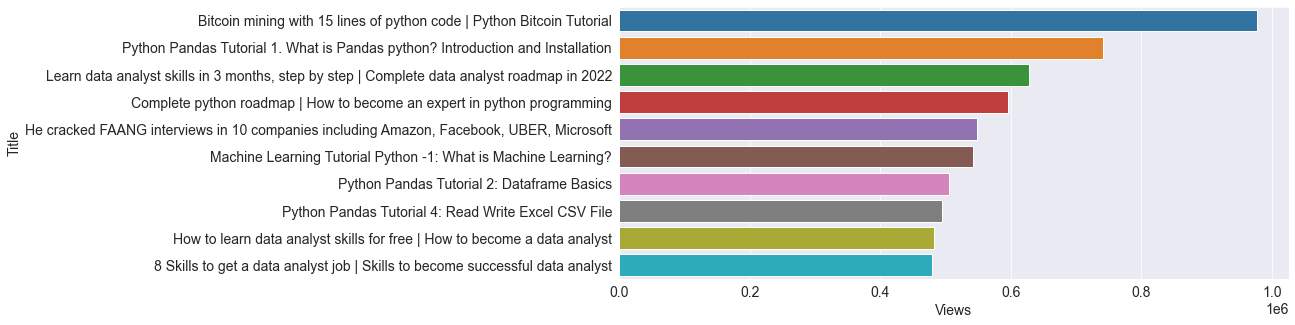

In [23]:
ax1 = sns.barplot(x='Views', y='Title', data=top_viewed_video)

## Asking and Answering Questions

We've seen many relationships above. Now, we'll see some interesting questions from the above insights of plots and about the channel according to our dataset.

#### Q1. Has this Corona pandemic affected this channel till now?

According to the yearwise statistics, Codebasics has uploaded 175 in 2020 and 137 videos till now in year 2021 which is higher than the total number of videos uploaded in year 2019. Also, channel is doing good in terms of views, likes and comments in this year so they are able to manage the channel in this pandemic with their video content.

#### Q2:  What is the title of most famous video of this channel?

In [24]:
pd.options.display.max_colwidth = 50
data.sort_values(by='Views',ascending=False).head(1)

,Title,Views,Likes,Comments,Published_date,year,month,day
143,Bitcoin mining with 15 lines of python code | ...,976660,29734,3328,2021-01-03,2021,1,3


In [25]:
pd.options.display.max_colwidth = 100
print(data.sort_values(by='Views',ascending=False).head(1)['Title'])

143    Bitcoin mining with 15 lines of python code | Python Bitcoin Tutorial
Name: Title, dtype: object


#### Q3: Which are the recent videos uploaded on this channel?

In [26]:
# Latest 10 videos from the dataset
pd.options.display.max_colwidth = 50
data.sort_values(by='Published_date',ascending=False).head(10)

,Title,Views,Likes,Comments,Published_date,year,month,day
0,Regex For NLP: NLP Tutorial For Beginners In P...,10321,357,24,2022-01-29,2022,1,29
1,Why NLP is booming right now? | NLP Tutorial F...,14118,451,29,2022-01-27,2022,1,27
2,Not getting enough time to learn data science?...,9263,415,18,2022-01-26,2022,1,26
3,NLP Tutorial For Beginners In Python - 1: In...,24690,997,65,2022-01-22,2022,1,22
4,Codebasics Coding Competition: 💥 𝐂𝐎𝐃𝐄-𝐀-𝐓𝐇𝐎𝐍 💥,2981,129,14,2022-01-21,2022,1,21
5,Data Engineering Interview Tips By Airbnb Data...,9840,303,17,2022-01-15,2022,1,15
6,Why I love Python?,5793,369,25,2022-01-12,2022,1,12
7,Data Engineering Career Tips By Airbnb Data En...,26293,731,36,2022-01-09,2022,1,9
8,Data Science Masters In USA - Live Q&A,10885,379,19,2022-01-02,2022,1,2
9,Is Auto ML going to kill data science jobs?,35577,952,49,2021-12-29,2021,12,29


#### Q4: Which is the most commented video of this channel?

In [27]:
pd.options.display.max_colwidth = 100
data.sort_values(by='Comments',ascending=False).head(1)

,Title,Views,Likes,Comments,Published_date,year,month,day
143,Bitcoin mining with 15 lines of python code | Python Bitcoin Tutorial,976660,29734,3328,2021-01-03,2021,1,3


## Inferences and Conclusion

In this project, we extracted Youtube channel Codebasics' videos information using Youtube API, Python, GoogleApiClient and requests libraries. We prepared our csv dataset using it. We cleaned this raw dataset, performed some operations to make it more convenient to use and analyse. Then we analysed different relationships among  views, likes, comments, months, years etc. We asked and answered some questions based on this information.

### Created By :- Anmol Malviya, Pursuing M.Sc In Data Science And Analytics From School Of Data Science And Forecasting, DAVV,Indore(M.P)
